In [530]:
import os
import pandas as pd
import numpy as np
import warnings; warnings.simplefilter('ignore')

In [531]:
## load data per year
Year_1978 = pd.read_csv('./gl1990-2018/GL1978.TXT',sep=',',header=None)
Year_1979 = pd.read_csv('./gl1990-2018/GL1979.TXT',sep=',',header=None)
Year_1980 = pd.read_csv('./gl1990-2018/GL1980.TXT',sep=',',header=None)
Year_1981 = pd.read_csv('./gl1990-2018/GL1981.TXT',sep=',',header=None)
Year_1982 = pd.read_csv('./gl1990-2018/GL1982.TXT',sep=',',header=None)
Year_1983 = pd.read_csv('./gl1990-2018/GL1983.TXT',sep=',',header=None)
Year_1984 = pd.read_csv('./gl1990-2018/GL1984.TXT',sep=',',header=None)
Year_1985 = pd.read_csv('./gl1990-2018/GL1985.TXT',sep=',',header=None)
Year_1986 = pd.read_csv('./gl1990-2018/GL1986.TXT',sep=',',header=None)
Year_1987 = pd.read_csv('./gl1990-2018/GL1987.TXT',sep=',',header=None)
Year_1988 = pd.read_csv('./gl1990-2018/GL1988.TXT',sep=',',header=None)
Year_1989 = pd.read_csv('./gl1990-2018/GL1989.TXT',sep=',',header=None)
Year_1990 = pd.read_csv('./gl1990-2018/GL1990.TXT',sep=',',header=None)
Year_1991 = pd.read_csv('./gl1990-2018/GL1991.TXT',sep=',',header=None)
Year_1992 = pd.read_csv('./gl1990-2018/GL1992.TXT',sep=',',header=None)
Year_1993 = pd.read_csv('./gl1990-2018/GL1993.TXT',sep=',',header=None)
Year_1994 = pd.read_csv('./gl1990-2018/GL1994.TXT',sep=',',header=None)
Year_1995 = pd.read_csv('./gl1990-2018/GL1995.TXT',sep=',',header=None)
Year_1996 = pd.read_csv('./gl1990-2018/GL1996.TXT',sep=',',header=None)
Year_1997 = pd.read_csv('./gl1990-2018/GL1997.TXT',sep=',',header=None)
Year_1998 = pd.read_csv('./gl1990-2018/GL1998.TXT',sep=',',header=None)
Year_1999 = pd.read_csv('./gl1990-2018/GL1999.TXT',sep=',',header=None)
Year_2000 = pd.read_csv('./gl1990-2018/GL2000.TXT',sep=',',header=None)
Year_2001 = pd.read_csv('./gl1990-2018/GL2001.TXT',sep=',',header=None)
Year_2002 = pd.read_csv('./gl1990-2018/GL2002.TXT',sep=',',header=None)
Year_2003 = pd.read_csv('./gl1990-2018/GL2003.TXT',sep=',',header=None)
Year_2004 = pd.read_csv('./gl1990-2018/GL2004.TXT',sep=',',header=None)
Year_2005 = pd.read_csv('./gl1990-2018/GL2005.TXT',sep=',',header=None)
Year_2006 = pd.read_csv('./gl1990-2018/GL2006.TXT',sep=',',header=None)
Year_2007 = pd.read_csv('./gl1990-2018/GL2007.TXT',sep=',',header=None)
Year_2008 = pd.read_csv('./gl1990-2018/GL2008.TXT',sep=',',header=None)
Year_2009 = pd.read_csv('./gl1990-2018/GL2009.TXT',sep=',',header=None)
Year_2010 = pd.read_csv('./gl1990-2018/GL2010.TXT',sep=',',header=None)
Year_2011 = pd.read_csv('./gl1990-2018/GL2011.TXT',sep=',',header=None)
Year_2012 = pd.read_csv('./gl1990-2018/GL2012.TXT',sep=',',header=None)
Year_2013 = pd.read_csv('./gl1990-2018/GL2013.TXT',sep=',',header=None)
Year_2014 = pd.read_csv('./gl1990-2018/GL2014.TXT',sep=',',header=None)
Year_2015 = pd.read_csv('./gl1990-2018/GL2015.TXT',sep=',',header=None)
Year_2016 = pd.read_csv('./gl1990-2018/GL2016.TXT',sep=',',header=None)
Year_2017 = pd.read_csv('./gl1990-2018/GL2017.TXT',sep=',',header=None)
Year_2018 = pd.read_csv('./gl1990-2018/GL2018.TXT',sep=',',header=None)

In [532]:
alldata = pd.concat([Year_1978, Year_1979, Year_1980, Year_1981, Year_1982, Year_1983, Year_1984, Year_1985, Year_1986, Year_1987, Year_1988, Year_1989, Year_1990, Year_1991, Year_1992, Year_1993, Year_1994, Year_1995, Year_1996, Year_1997, Year_1998, Year_1999, Year_2000, Year_2001, Year_2002, Year_2003, Year_2004, Year_2005, Year_2006, Year_2007, Year_2008, Year_2009, Year_2010, Year_2011, Year_2012, Year_2013, Year_2014, Year_2015, Year_2016, Year_2017, Year_2018])

In [533]:
alldata.shape

(92291, 161)

In [534]:
##Only keep Toronto home games
tordata = alldata[alldata[6] == 'TOR']
tordata.shape

(3262, 161)

In [535]:
tordata = tordata.reset_index(drop = True) ## Reset index. Old one is based on all the other teams
from dateutil.parser import parse
tordata[0]=pd.to_datetime(tordata[0],format='%Y%m%d')  ## convert to datetime
tordata.set_index(0, inplace = True) ## set datetime as index

In [536]:
###Extract relevant columns 

data = tordata[[1, 2, 3, 4, 12, 13, 17, 23,51, 9, 10]]
data.columns = ['GameType','DayOfWeek','VisitingTeam_Team','VisitingTeam_League','DayNight','Completion','Attendance','VisitingTeam_Hits','HomeTeam_Hits','VisitingScore','HomeScore']


In [537]:
## Create Winner column based PointDifferential
data['PointDifferential'] = data['HomeScore'] - data['VisitingScore']
data.loc[data['PointDifferential'] > 0, 'Winner'] = 'W'
data.loc[data['PointDifferential'] < 0, 'Winner'] = 'L'
data.head()
    

,GameType,DayOfWeek,VisitingTeam_Team,VisitingTeam_League,DayNight,Completion,Attendance,VisitingTeam_Hits,HomeTeam_Hits,VisitingScore,HomeScore,PointDifferential,Winner
0,,,,,,,,,,,,,
1978-04-14,0,Fri,DET,AL,D,NaN,35761.0,1.0,2.0,8,10,2,W
1978-04-15,0,Sat,DET,AL,D,NaN,15024.0,2.0,1.0,6,3,-3,L
1978-04-16,0,Sun,DET,AL,D,NaN,17088.0,1.0,2.0,4,3,-1,L
1978-04-17,0,Mon,KCA,AL,D,NaN,10169.0,1.0,2.0,3,1,-2,L
1978-04-18,0,Tue,KCA,AL,D,NaN,10218.0,2.0,0.0,5,0,-5,L


In [538]:
data = data.loc[data['GameType'] != 1] ## Exclude one game of double-header that has no attendance

In [539]:
## Assign a game number for each game of each season
gamesperyear = data.groupby(data.index.year)['GameType'].count().values ## Determine amount of games/year
data['GameNumber'] = ""
for i, year in enumerate(data.index.year.unique().values):
    data.loc[data.index.year == year, 'GameNumber'] = list(range(1,gamesperyear[i]+1))

In [540]:
## WinnerNumber column is useful for calculating WinLossRatio (next cell)
data['WinnerNumber'] = ""
data.loc[data['Winner'] == 'W', 'WinnerNumber'] = 1
data.loc[data['Winner'] == 'L', 'WinnerNumber'] = -1

In [541]:
######################### This is calculated on all games, not just home games

## Create Winlossratio column which calculates win/loss for all prior games in a season
## Also creates WinLossRatioLast10 which is win/loss ratio for last 10 games

#data['WinLossRatio'] = ''
#data['WinLossRatioLast10'] = ''

#for j, year in enumerate(data.index.year.unique().values):
#    i = gamesperyear[j]
#    ## Win/loss for all season
#    data.loc[(data.index.year == year) & (data['GameNumber'] == 1),'WinLossRatio'] = 0
#    data.loc[(data.index.year == year) & (data['GameNumber'].isin(list(range(2,i+1)))),'WinLossRatio'] = data.loc[data.index.year == year,'WinnerNumber'].cumsum()[:-1].values
#    ## Win/loss for last 10 games
#    data.loc[(data.index.year == year) & (data['GameNumber'] == 1),'WinLossRatioLast10'] = 0
#    data.loc[(data.index.year == year) & (data['GameNumber'].isin(list(range(2,i+1)))),'WinLossRatioLast10'] = data.loc[data.index.year == year,'WinnerNumber'].rolling(min_periods=1, window=10).sum()[:-1].values


In [542]:
## Import weather data, set it to index
AllWheather_df = pd.read_csv('./Data/weatherstats_toronto_daily.csv',usecols = ['date','max_temperature','max_relative_humidity','max_wind_speed','avg_visibility','precipitation'])
AllWheather_df['date']=pd.to_datetime(AllWheather_df['date'], format='%y-%m-%d')
AllWheather_df.set_index('date', inplace = True)
AllWheather_df.head()

,max_temperature,max_relative_humidity,max_wind_speed,avg_visibility,precipitation
date,,,,,
2019-05-16,14.3,88,29,24120,0.1
2019-05-15,20.1,83,32,24100,0.8
2019-05-14,15.6,97,25,14450,0.4
2019-05-13,7.5,97,38,8450,7.6
2019-05-12,9.6,93,44,14050,5.4


In [543]:
data = data.join(AllWheather_df,how='left')

In [544]:
data['year']=data.index.year
data['month']=data.index.month
data.head()

,GameType,DayOfWeek,VisitingTeam_Team,VisitingTeam_League,DayNight,Completion,Attendance,VisitingTeam_Hits,HomeTeam_Hits,VisitingScore,...,Winner,GameNumber,WinnerNumber,max_temperature,max_relative_humidity,max_wind_speed,avg_visibility,precipitation,year,month
0,,,,,,,,,,,,,,,,,,,,,
1978-04-14,0,Fri,DET,AL,D,NaN,35761.0,1.0,2.0,8,...,W,1,1,5.8,93,37,28150,0.0,1978,4
1978-04-15,0,Sat,DET,AL,D,NaN,15024.0,2.0,1.0,6,...,L,2,-1,4.9,83,35,28150,0.0,1978,4
1978-04-16,0,Sun,DET,AL,D,NaN,17088.0,1.0,2.0,4,...,L,3,-1,8.6,93,17,32150,0.0,1978,4
1978-04-17,0,Mon,KCA,AL,D,NaN,10169.0,1.0,2.0,3,...,L,4,-1,10.2,85,17,32600,0.0,1978,4
1978-04-18,0,Tue,KCA,AL,D,NaN,10218.0,2.0,0.0,5,...,L,5,-1,11.0,84,50,32150,1.4,1978,4


In [545]:
## Create Homeopener variable
data.loc[data['GameNumber'] == 1, 'HomeOpener'] = 1
data.loc[data['GameNumber'] != 1, 'HomeOpener'] = 0

In [546]:
tennis_df = pd.read_csv('./data/tournaments_1877-2017_unindexed.csv', encoding = "ISO-8859-1")

In [547]:
tennis_df[tennis_df['tourney_location'] == 'Toronto'].head()

,tourney_year,tourney_order,tourney_name,tourney_id,tourney_slug,tourney_location,"tourney_Start_dates, lasts 7 days",tourney_month,tourney_day,tourney_singles_draw,...,singles_winner_player_id,doubles_winner_1_name,doubles_winner_1_url,doubles_winner_1_player_slug,doubles_winner_1_player_id,doubles_winner_2_name,doubles_winner_2_url,doubles_winner_2_player_slug,doubles_winner_2_player_id,tourney_year_id
268,1968,9,Montreal / Toronto,421.0,montreal,Toronto,1968.08.12,8.0,12.0,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968-421
295,1969,23,Montreal / Toronto,421.0,montreal,Toronto,1969.08.09,8.0,9.0,64,...,r071,Ron Holmberg,/en/players/ron-holmberg/h061/overview,ron-holmberg,h061,John Newcombe,/en/players/john-newcombe/n044/overview,john-newcombe,n044,1969-421
353,1970,49,Montreal / Toronto,421.0,montreal,Toronto,1970.08.12,8.0,12.0,32,...,l058,Bill Bowrey,/en/players/bill-bowrey/b224/overview,bill-bowrey,b224,Marty Riessen,/en/players/marty-riessen/r055/overview,marty-riessen,r055,1970-421
449,1972,15,Toronto WCT,302.0,toronto,Toronto,1972.02.20,2.0,20.0,32,...,l058,Bob Carmichael,/en/players/bob--carmichael/c080/overview,bob--carmichael,c080,Ray Ruffels,/en/players/ray-ruffels/r076/overview,ray-ruffels,r076,1972-302
531,1973,15,Toronto WCT,302.0,toronto,Toronto,1973.02.11,2.0,11.0,32,...,l058,John Alexander,/en/players/john-alexander/a014/overview,john-alexander,a014,Phil Dent,/en/players/phil-dent/d074/overview,phil-dent,d074,1973-302


In [548]:
soccer_df=pd.read_csv('./data/soccer.csv')

In [549]:
soccer_df.head()

,Game #,Date,Home,HomeScore,Visitor,VisitorScore,Attendance
0,1,1996-04-06,HOU/SJ,1,DC United,0,"31,683"
1,2,1996-04-13,Tampa Bay,3,New England,2,"26,473"
2,3,1996-04-13,Columbus,4,DC United,0,"25,266"
3,4,1996-04-13,Kansas City,3,Colorado,0,"21,141"
4,5,1996-04-13,Los Angeles,2,NJ/NY,1,"69,255"


In [550]:
soccer_df['Date'] = pd.to_datetime(soccer_df['Date'], format='%Y-%m-%d')
soccer_df.set_index('Date', inplace = True)

In [551]:
soccer_df = soccer_df[soccer_df['Home'] == 'Toronto']


In [552]:
soccer_df['Soccergame'] = 1
soccer_df = soccer_df.drop(['Game #','Home','HomeScore','Visitor','Attendance','VisitorScore'],axis=1)



In [553]:
data = data.join(soccer_df, how='left')

In [554]:
data['Soccergame'] = data['Soccergame'].fillna(0)

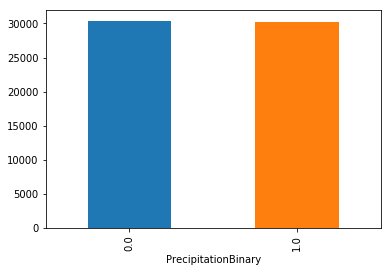

In [555]:
## Try precipitation as a binary variable, 0 = no rain, 1 = any rain
data.loc[data['precipitation']== 0,'PrecipitationBinary'] = 0 
data.loc[data['precipitation']!= 0,'PrecipitationBinary'] = 1 
data.groupby('PrecipitationBinary')['Attendance'].mean().plot.bar()

In [556]:
data.loc[data['DayNight'] == 'D', 'DayNight'] = 0
data.loc[data['DayNight'] == 'N', 'DayNight'] = 1

In [569]:
yankees_df = pd.read_csv('Yankees.csv',usecols=['0','yankees_WinLossRatio'])
orioles_df = pd.read_csv('Orioles.csv',usecols=['0','orioles_WinLossRatio'])
redsox_df = pd.read_csv('RedSox.csv',usecols=['0','redsox_WinLossRatio'])
torontoaway_df = pd.read_csv('BlueJays.csv',usecols=['0','WinLossRatio','WinLossRatioLast10'])

In [570]:
yankees_df['0']= pd.to_datetime(yankees_df['0'], format='%Y-%m-%d')
yankees_df.set_index(yankees_df['0'],inplace=True,drop=True)
yankees_df.drop('0',axis=1,inplace=True)

orioles_df['0']= pd.to_datetime(orioles_df['0'], format='%Y-%m-%d')
orioles_df.set_index(orioles_df['0'],inplace=True)
orioles_df.drop('0',axis=1,inplace=True)

redsox_df['0']= pd.to_datetime(redsox_df['0'], format='%Y-%m-%d')
redsox_df.set_index(redsox_df['0'],inplace=True)
redsox_df.drop('0',axis=1,inplace=True)

torontoaway_df['0']= pd.to_datetime(torontoaway_df['0'], format='%Y-%m-%d')
torontoaway_df.set_index(torontoaway_df['0'],inplace=True)
torontoaway_df.drop('0',axis=1,inplace=True)

In [571]:
ShortTermPred_df = data[['DayOfWeek','VisitingTeam_Team','DayNight','Attendance','GameNumber','max_temperature','precipitation','year','month','HomeOpener','Soccergame']]
ShortTermPred_df.dropna(inplace=True)

In [572]:
ShortTermPred_df = pd.merge_asof(ShortTermPred_df, yankees_df, left_index=True, right_index=True)
ShortTermPred_df = pd.merge_asof(ShortTermPred_df, orioles_df, left_index=True, right_index=True)
ShortTermPred_df = pd.merge_asof(ShortTermPred_df, redsox_df, left_index=True, right_index=True)
ShortTermPred_df = pd.merge_asof(ShortTermPred_df, torontoaway_df, left_index=True, right_index=True)

In [573]:
ShortTermPred_df.head()

,DayOfWeek,VisitingTeam_Team,DayNight,Attendance,GameNumber,max_temperature,precipitation,year,month,HomeOpener,Soccergame,yankees_WinLossRatio,orioles_WinLossRatio,redsox_WinLossRatio,WinLossRatio,WinLossRatioLast10
0,,,,,,,,,,,,,,,,
1978-04-14,Fri,DET,0,35761.0,1,5.8,0.0,1978,4,1.0,0.0,-3,-5,-1,-3,-3.0
1978-04-15,Sat,DET,0,15024.0,2,4.9,0.0,1978,4,0.0,0.0,-2,-4,0,-2,-2.0
1978-04-16,Sun,DET,0,17088.0,3,8.6,0.0,1978,4,0.0,0.0,-1,-3,1,-3,-3.0
1978-04-17,Mon,KCA,0,10169.0,4,10.2,0.0,1978,4,0.0,0.0,0,-4,2,-4,-4.0
1978-04-18,Tue,KCA,0,10218.0,5,11.0,1.4,1978,4,0.0,0.0,-1,-3,3,-5,-5.0


In [575]:
ShortTermPred_df['GamesBack'] = ShortTermPred_df['WinLossRatio'] - ShortTermPred_df[['yankees_WinLossRatio','orioles_WinLossRatio','redsox_WinLossRatio']].max(axis=1) 

In [578]:
ShortTermPred_df.corr()

,DayNight,Attendance,GameNumber,max_temperature,precipitation,year,month,HomeOpener,Soccergame,yankees_WinLossRatio,orioles_WinLossRatio,redsox_WinLossRatio,WinLossRatio,WinLossRatioLast10,GamesBack
DayNight,1.000000,-0.208706,-0.003200,0.027149,-0.016569,0.024566,0.000686,-0.035004,-0.125944,-0.005151,0.010900,-0.000679,0.000856,-0.018389,-0.002476
Attendance,-0.208706,1.000000,0.158020,0.124262,0.024170,0.025789,0.128591,0.123511,0.035877,-0.240958,0.032133,-0.138448,0.361114,0.183551,0.282419
GameNumber,-0.003200,0.158020,1.000000,0.477788,-0.012521,0.043940,0.974451,-0.190801,0.021716,0.454536,-0.084259,0.357791,0.047635,0.041642,-0.403415
max_temperature,0.027149,0.124262,0.477788,1.000000,-0.057062,0.043785,0.470270,-0.214933,0.011269,0.253110,-0.065528,0.211662,0.024951,0.027341,-0.206665
precipitation,-0.016569,0.024170,-0.012521,-0.057062,1.000000,-0.008673,-0.011915,0.042046,-0.016851,-0.009167,-0.013751,-0.015188,0.017268,0.011557,0.023109
year,0.024566,0.025789,0.043940,0.043785,-0.008673,1.000000,-0.027383,-0.002271,0.206499,0.157400,-0.271309,0.125253,0.035209,0.007998,-0.028949
month,0.000686,0.128591,0.974451,0.470270,-0.011915,-0.027383,1.000000,-0.170541,0.007940,0.440577,-0.054353,0.344176,0.010289,0.023853,-0.417395
HomeOpener,-0.035004,0.123511,-0.190801,-0.214933,0.042046,-0.002271,-0.170541,1.000000,-0.019206,-0.084281,0.008407,-0.060379,0.000937,0.002956,0.077039
Soccergame,-0.125944,0.035877,0.021716,0.011269,-0.016851,0.206499,0.007940,-0.019206,1.000000,-0.003453,-0.029060,0.028745,0.013661,0.006546,0.001952
yankees_WinLossRatio,-0.005151,-0.240958,0.454536,0.253110,-0.009167,0.157400,0.440577,-0.084281,-0.003453,1.000000,-0.251411,0.379397,-0.198365,-0.061106,-0.597366


In [579]:
ShortTermPred_df.to_csv('ShortTermPred.csv')

In [564]:
#data.columns
WinByYear=data.groupby(data.index.year)['Winner'].value_counts(1)
#WinByYear.loc[WinByYear['Winner'] == 'W']

In [565]:
ShortTermPred_df

,DayOfWeek,VisitingTeam_Team,DayNight,Attendance,GameNumber,max_temperature,precipitation,year,month,HomeOpener,Soccergame
0,,,,,,,,,,,
1978-04-14,Fri,DET,0,35761.0,1,5.8,0.0,1978,4,1.0,0.0
1978-04-15,Sat,DET,0,15024.0,2,4.9,0.0,1978,4,0.0,0.0
1978-04-16,Sun,DET,0,17088.0,3,8.6,0.0,1978,4,0.0,0.0
1978-04-17,Mon,KCA,0,10169.0,4,10.2,0.0,1978,4,0.0,0.0
1978-04-18,Tue,KCA,0,10218.0,5,11.0,1.4,1978,4,0.0,0.0
1978-04-19,Wed,NYA,0,13306.0,6,9.6,10.8,1978,4,0.0,0.0
1978-04-21,Fri,CHA,0,10108.0,7,4.9,0.0,1978,4,0.0,0.0
1978-04-22,Sat,CHA,0,44327.0,8,9.0,0.0,1978,4,0.0,0.0
1978-04-23,Sun,CHA,0,17427.0,9,10.9,0.0,1978,4,0.0,0.0


In [ ]:
ShortTermPred_df.head(30)